In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>"
HTML(style)

In [4]:
titanic_data = pd.read_csv('train (1).csv')

In [5]:
titanic_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [6]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 
                       'Cabin'], axis = 1)

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
X = pd.get_dummies(X)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [11]:
X.Age.median()

28.0

In [12]:
X = X.fillna({'Age' : X.Age.median()})
titanic_data.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
y = titanic_data.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [15]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

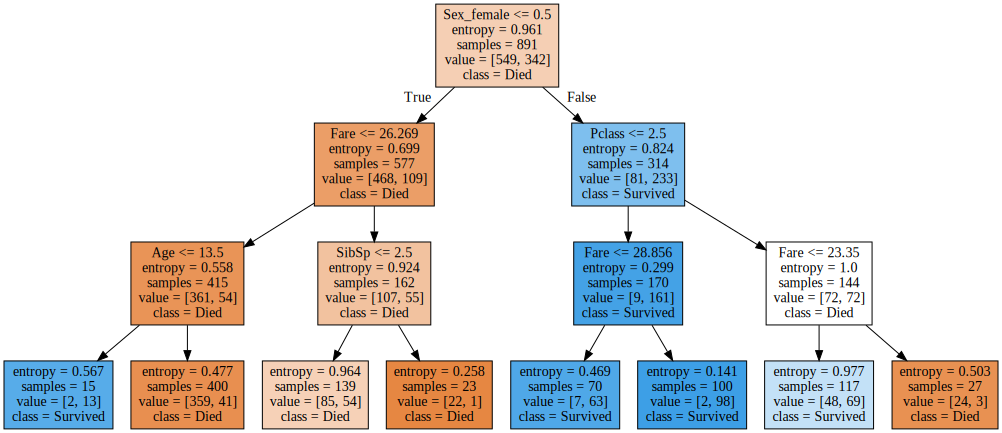

In [16]:
graph = Source(tree.export_graphviz(clf, out_file = None,
                                   feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [17]:
# total = clf.feature_importances_
# total

In [18]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [20]:
X_train.shape

(596, 10)

In [21]:
X_test.shape

(295, 10)

In [22]:
clf.score(X, y)

0.8226711560044894

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
clf.score(X_train, y_train) #известные данные

0.8238255033557047

In [25]:
clf.score(X_test, y_test)

0.8203389830508474

In [26]:
max_depth_values = range(1, 100)

In [27]:
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)   

In [29]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                         value_vars = ['train_score', 'test_score', 'cross_val_score'],
                         var_name = 'set_type',
                         value_name = 'score')

In [30]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


In [31]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.800392


In [32]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.800392
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.798697
205,8,cross_val_score,0.800364
206,9,cross_val_score,0.793627
207,10,cross_val_score,0.802031


<AxesSubplot:xlabel='max_depth', ylabel='score'>

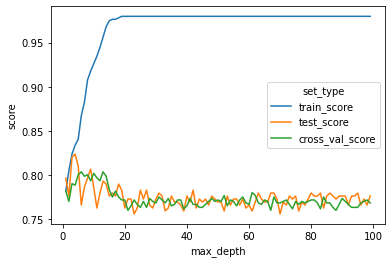

In [33]:
sns.lineplot(data = scores_data_long, x = 'max_depth', y = 'score',
            hue = 'set_type')

In [34]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=10)

In [35]:
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.8033898305084746

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [38]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [39]:
GridSearchCV_clf = GridSearchCV(clf, parametrs)

In [40]:
GridSearchCV_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [41]:
GridSearchCV_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [42]:
best_clf = GridSearchCV_clf.best_estimator_

In [43]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [44]:
best_clf.score(X_test, y_test)

0.7661016949152543

In [45]:
from sklearn.metrics import precision_score, recall_score

In [46]:
y_pred = best_clf.predict(X_test)

In [47]:
precision_score(y_test, y_pred)

0.7931034482758621

In [48]:
recall_score(y_test, y_pred)

0.575

In [49]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [50]:
y_predicted_prob

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

<AxesSubplot:>

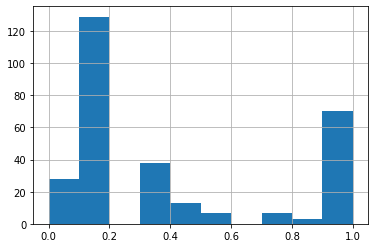

In [51]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [52]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [53]:
precision_score(y_test, y_pred)

0.8493150684931506

In [54]:
recall_score(y_test, y_pred)

0.5166666666666667

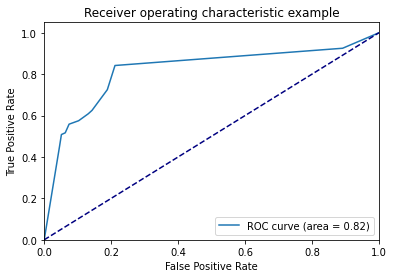

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr ,label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [56]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3, 
                                  min_samples_split = 100,
                                  min_samples_leaf = 10)

In [57]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

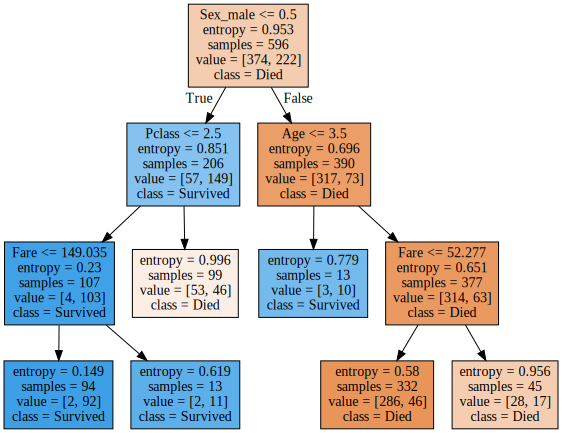

In [58]:
graph = Source(tree.export_graphviz(clf, out_file = None,
                                   feature_names = list(X),
                                   class_names = ['Died', 'Survived'],
                                   filled = True))
display(SVG(graph.pipe(format = 'svg')))

In [59]:
parametrs = {'criterion' : ['gini', 'entropy'],\
             'max_depth': range(1, 10),\
             'min_samples_split' : range(10, 110, 10),\
             'min_samples_leaf' : range (1, 11)}

In [60]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [61]:
GridSearchCV_clf = GridSearchCV(clf, parametrs)

In [62]:
GridSearchCV_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(10, 110, 10)})

In [63]:
GridSearchCV_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 10}

In [64]:
best_clf = GridSearchCV_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10)

In [65]:
best_clf.score(X_test, y_test)

0.8067796610169492

In [66]:
precision_score(y_test, y_pred)

0.8493150684931506

In [67]:
recall_score(y_test, y_pred)

0.5166666666666667

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
clf_rf = RandomForestClassifier()

In [70]:
parameters = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10]}

In [71]:
grid_search_csv_clf = GridSearchCV(clf_rf, parameters, cv = 5)

In [72]:
grid_search_csv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [75]:
grid_search_csv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [76]:
best_clf = grid_search_csv_clf.best_estimator_

In [77]:
best_clf.score(X_test, y_test)

0.8169491525423729

In [79]:
feature_importances = best_clf.feature_importances_

In [80]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),\
                                       'feature_importances' :\
                                       feature_importances})

In [83]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
5,Sex_female,0.307837
6,Sex_male,0.188484
4,Fare,0.144913
0,Pclass,0.137306
1,Age,0.118965
2,SibSp,0.033534
3,Parch,0.029949
7,Embarked_C,0.017257
9,Embarked_S,0.013835
8,Embarked_Q,0.007921
